In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint
import gc

# Loading Data

#### Taxi

In [10]:
taxi_df = pd.read_parquet('/Users/ikmalbasirun/Documents/GitHub/NYC_Transportation_Demand/data/raw/yellow_tripdata_2024-12.parquet')

#### For-Hire Vehicles

In [11]:
fhv_trip_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-12.parquet')

#### Bus

In [12]:
bus_ridership_df = pd.read_csv('/Users/ikmalbasirun/Documents/GitHub/NYC_Transportation_Demand/data/raw/MTA_Bus_Hourly_Ridership__2020-2024_20250415.csv')

#### Subway

In [14]:
subway_ridership_df = pd.read_csv('/Users/ikmalbasirun/Documents/GitHub/NYC_Transportation_Demand/data/raw/MTA_Subway_Hourly_Ridership__2020-2024_20250415.csv')

#### Taxi Zone

In [15]:
taxi_zone_df = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')

# Data Aggreration

## Data Manipulation

### FHV DF

In [16]:
# filter only December 2024
fhv_trip_df = fhv_trip_df.loc[
    (fhv_trip_df['request_datetime'].dt.year == 2024) &
    (fhv_trip_df['request_datetime'].dt.month == 12)
    ]

fhv_trip_df.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-12-01 00:26:25,2024-12-01 00:28:18,2024-12-01 00:30:18,2024-12-01 00:45:00,81,213,6.160,...,1.24,0.0,0.0,0.0,20.80,N,N,N,N,N
1,HV0003,B03404,B03404,2024-12-01 00:43:16,2024-12-01 00:46:46,2024-12-01 00:47:39,2024-12-01 00:55:03,213,213,1.810,...,0.95,0.0,0.0,0.0,10.62,N,N,N,N,N
2,HV0003,B03404,B03404,2024-12-01 00:02:09,2024-12-01 00:07:28,2024-12-01 00:09:29,2024-12-01 00:20:48,221,221,1.460,...,0.99,0.0,0.0,0.0,9.59,Y,N,N,N,N
3,HV0003,B03404,B03404,2024-12-01 00:20:28,2024-12-01 00:27:04,2024-12-01 00:29:05,2024-12-01 00:35:57,245,245,1.830,...,1.07,0.0,0.0,0.0,8.00,N,N,N,N,N
4,HV0003,B03404,B03404,2024-12-01 00:32:23,2024-12-01 00:35:52,2024-12-01 00:36:43,2024-12-01 01:05:17,245,109,9.290,...,3.86,0.0,0.0,0.0,30.79,N,N,N,N,N
5,HV0003,B03404,B03404,2024-12-01 00:07:55,2024-12-01 00:11:20,2024-12-01 00:11:29,2024-12-01 00:15:25,89,89,0.660,...,0.78,0.0,0.0,0.0,5.39,N,N,N,N,N
6,HV0003,B03404,B03404,2024-12-01 00:16:48,2024-12-01 00:21:08,2024-12-01 00:21:53,2024-12-01 00:25:22,89,89,0.470,...,0.79,0.0,0.0,5.0,5.39,N,N,N,N,N
7,HV0003,B03404,B03404,2024-12-01 00:46:41,2024-12-01 00:47:08,2024-12-01 00:47:47,2024-12-01 01:13:55,189,91,5.660,...,2.53,0.0,0.0,0.0,22.93,N,N,N,N,N
8,HV0005,B03406,None,2024-12-01 00:14:47,NaT,2024-12-01 00:20:11,2024-12-01 00:28:45,112,255,1.395,...,0.65,0.0,0.0,0.0,7.45,N,N,N,N,Y
9,HV0005,B03406,None,2024-12-01 00:26:21,NaT,2024-12-01 00:33:49,2024-12-01 00:39:07,255,80,0.931,...,0.57,0.0,0.0,2.0,5.47,N,N,N,N,Y


In [17]:
fhv_trip_df.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-12-01 00:26:25,2024-12-01 00:28:18,2024-12-01 00:30:18,2024-12-01 00:45:00,81,213,6.160,...,1.24,0.0,0.0,0.0,20.80,N,N,N,N,N
1,HV0003,B03404,B03404,2024-12-01 00:43:16,2024-12-01 00:46:46,2024-12-01 00:47:39,2024-12-01 00:55:03,213,213,1.810,...,0.95,0.0,0.0,0.0,10.62,N,N,N,N,N
2,HV0003,B03404,B03404,2024-12-01 00:02:09,2024-12-01 00:07:28,2024-12-01 00:09:29,2024-12-01 00:20:48,221,221,1.460,...,0.99,0.0,0.0,0.0,9.59,Y,N,N,N,N
3,HV0003,B03404,B03404,2024-12-01 00:20:28,2024-12-01 00:27:04,2024-12-01 00:29:05,2024-12-01 00:35:57,245,245,1.830,...,1.07,0.0,0.0,0.0,8.00,N,N,N,N,N
4,HV0003,B03404,B03404,2024-12-01 00:32:23,2024-12-01 00:35:52,2024-12-01 00:36:43,2024-12-01 01:05:17,245,109,9.290,...,3.86,0.0,0.0,0.0,30.79,N,N,N,N,N
5,HV0003,B03404,B03404,2024-12-01 00:07:55,2024-12-01 00:11:20,2024-12-01 00:11:29,2024-12-01 00:15:25,89,89,0.660,...,0.78,0.0,0.0,0.0,5.39,N,N,N,N,N
6,HV0003,B03404,B03404,2024-12-01 00:16:48,2024-12-01 00:21:08,2024-12-01 00:21:53,2024-12-01 00:25:22,89,89,0.470,...,0.79,0.0,0.0,5.0,5.39,N,N,N,N,N
7,HV0003,B03404,B03404,2024-12-01 00:46:41,2024-12-01 00:47:08,2024-12-01 00:47:47,2024-12-01 01:13:55,189,91,5.660,...,2.53,0.0,0.0,0.0,22.93,N,N,N,N,N
8,HV0005,B03406,None,2024-12-01 00:14:47,NaT,2024-12-01 00:20:11,2024-12-01 00:28:45,112,255,1.395,...,0.65,0.0,0.0,0.0,7.45,N,N,N,N,Y
9,HV0005,B03406,None,2024-12-01 00:26:21,NaT,2024-12-01 00:33:49,2024-12-01 00:39:07,255,80,0.931,...,0.57,0.0,0.0,2.0,5.47,N,N,N,N,Y


In [18]:
fhs_code = {'HV0002':'Juno', 'HV0003':'Uber', 'HV0004':'Via', 'HV0005':'Lyft'}

# Create a new column for For-Hire Services
fhv_trip_df['service_provider'] = fhv_trip_df['hvfhs_license_num'].replace(fhs_code)

# Remove unnecessary columns
fhv_trip_df.drop(columns=['hvfhs_license_num',
                          'dispatching_base_num','originating_base_num',
                          'shared_request_flag','shared_match_flag','access_a_ride_flag',
                          'wav_request_flag','wav_match_flag','DOLocationID','on_scene_datetime','dropoff_datetime','trip_miles','trip_time',
                          'base_passenger_fare','tolls','bcf','sales_tax','tips','driver_pay','airport_fee','congestion_surcharge'
                          ], 
                          inplace=True)

fhv_trip_df.rename(columns={'pickup_datetime':'transit_timestamp',
                            'PULocationID':'LocationID'
                            },
                   inplace=True)

fhv_trip_df.sample(10)

,request_datetime,transit_timestamp,LocationID,service_provider
6278842,2024-12-09 23:15:51,2024-12-09 23:18:20,142,Uber
8656384,2024-12-13 09:53:00,2024-12-13 09:56:14,209,Uber
3397214,2024-12-06 06:32:42,2024-12-06 06:42:29,214,Uber
20320486,2024-12-30 21:04:38,2024-12-30 21:07:18,255,Uber
1303965,2024-12-03 07:43:43,2024-12-03 07:48:54,167,Uber
13228136,2024-12-19 14:22:19,2024-12-19 14:24:53,181,Uber
15474191,2024-12-22 11:25:18,2024-12-22 11:29:12,107,Lyft
6172919,2024-12-09 19:47:03,2024-12-09 19:51:31,92,Uber
11490963,2024-12-16 21:29:57,2024-12-16 21:43:39,75,Uber
12095637,2024-12-17 21:21:38,2024-12-17 21:32:18,158,Uber


In [19]:
fhv_trip_df['waiting_time'] = fhv_trip_df['transit_timestamp'].dt.minute - fhv_trip_df['request_datetime'].dt.minute

fhv_trip_df.head(10)

,request_datetime,transit_timestamp,LocationID,service_provider,waiting_time
0,2024-12-01 00:26:25,2024-12-01 00:30:18,81,Uber,4
1,2024-12-01 00:43:16,2024-12-01 00:47:39,213,Uber,4
2,2024-12-01 00:02:09,2024-12-01 00:09:29,221,Uber,7
3,2024-12-01 00:20:28,2024-12-01 00:29:05,245,Uber,9
4,2024-12-01 00:32:23,2024-12-01 00:36:43,245,Uber,4
5,2024-12-01 00:07:55,2024-12-01 00:11:29,89,Uber,4
6,2024-12-01 00:16:48,2024-12-01 00:21:53,89,Uber,5
7,2024-12-01 00:46:41,2024-12-01 00:47:47,189,Uber,1
8,2024-12-01 00:14:47,2024-12-01 00:20:11,112,Lyft,6
9,2024-12-01 00:26:21,2024-12-01 00:33:49,255,Lyft,7


In [20]:
print(fhv_trip_df['waiting_time'].isnull().sum() / len(fhv_trip_df)* 100)

0.0


In [21]:
fhv_trip_df.drop(columns=['request_datetime'],inplace=True)

In [22]:
fhv_trip_df.head(10)

,transit_timestamp,LocationID,service_provider,waiting_time
0,2024-12-01 00:30:18,81,Uber,4
1,2024-12-01 00:47:39,213,Uber,4
2,2024-12-01 00:09:29,221,Uber,7
3,2024-12-01 00:29:05,245,Uber,9
4,2024-12-01 00:36:43,245,Uber,4
5,2024-12-01 00:11:29,89,Uber,4
6,2024-12-01 00:21:53,89,Uber,5
7,2024-12-01 00:47:47,189,Uber,1
8,2024-12-01 00:20:11,112,Lyft,6
9,2024-12-01 00:33:49,255,Lyft,7


### Taxi DF

In [23]:
#filter for only December 2025
taxi_df = taxi_df.loc[
    (taxi_df['tpep_pickup_datetime'].dt.year == 2024) &
    (taxi_df['tpep_pickup_datetime'].dt.month == 12)
    ]

taxi_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00
5,1,2024-12-01 00:21:17,2024-12-01 00:37:22,1.0,4.30,1.0,N,249,141,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.00
6,2,2024-12-01 00:04:53,2024-12-01 00:31:03,1.0,7.66,1.0,N,186,52,1,35.2,1.0,0.5,8.04,0.00,1.0,48.24,2.5,0.00
7,1,2024-12-01 00:15:28,2024-12-01 00:20:13,1.0,0.30,1.0,N,148,148,3,5.8,3.5,0.5,0.00,0.00,1.0,10.80,2.5,0.00
8,1,2024-12-01 00:38:54,2024-12-01 01:03:46,1.0,9.40,1.0,N,234,244,1,39.4,3.5,0.5,0.00,0.00,1.0,44.40,2.5,0.00
9,2,2024-12-01 00:00:21,2024-12-01 00:05:27,2.0,0.72,1.0,N,211,231,1,7.2,1.0,0.5,2.44,0.00,1.0,14.64,2.5,0.00
10,2,2024-12-01 00:07:13,2024-12-01 00:20:57,2.0,3.54,1.0,N,231,48,1,17.7,1.0,0.5,4.54,0.00,1.0,27.24,2.5,0.00


In [24]:
taxi_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00
5,1,2024-12-01 00:21:17,2024-12-01 00:37:22,1.0,4.30,1.0,N,249,141,1,20.5,3.5,0.5,5.10,0.00,1.0,30.60,2.5,0.00
6,2,2024-12-01 00:04:53,2024-12-01 00:31:03,1.0,7.66,1.0,N,186,52,1,35.2,1.0,0.5,8.04,0.00,1.0,48.24,2.5,0.00
7,1,2024-12-01 00:15:28,2024-12-01 00:20:13,1.0,0.30,1.0,N,148,148,3,5.8,3.5,0.5,0.00,0.00,1.0,10.80,2.5,0.00
8,1,2024-12-01 00:38:54,2024-12-01 01:03:46,1.0,9.40,1.0,N,234,244,1,39.4,3.5,0.5,0.00,0.00,1.0,44.40,2.5,0.00
9,2,2024-12-01 00:00:21,2024-12-01 00:05:27,2.0,0.72,1.0,N,211,231,1,7.2,1.0,0.5,2.44,0.00,1.0,14.64,2.5,0.00
10,2,2024-12-01 00:07:13,2024-12-01 00:20:57,2.0,3.54,1.0,N,231,48,1,17.7,1.0,0.5,4.54,0.00,1.0,27.24,2.5,0.00


In [25]:

taxi_df['service_provider'] = 'Taxi' #Purpose: To fill in the 'service_provider' before joining the FHV DataFrame
taxi_df['waiting_time'] = 0.0 #Purpose: To fill in missing values before joining with the FHV DataFrame

taxi_df.rename(columns=
                    {'tpep_pickup_datetime':'transit_timestamp',
                     'PULocationID':'LocationID'
                     }, 
                    inplace=True)

taxi_df.drop(columns=['VendorID','passenger_count','store_and_fwd_flag',
                           'Airport_fee','improvement_surcharge','tolls_amount','tip_amount','mta_tax',
                           'payment_type','DOLocationID','RatecodeID','trip_distance','tpep_dropoff_datetime',
                           'fare_amount','total_amount','extra','congestion_surcharge'
                           ], inplace=True)

taxi_df.head(10)                        

,transit_timestamp,LocationID,service_provider,waiting_time
0,2024-12-01 00:12:27,138,Taxi,0.0
2,2024-12-01 00:50:35,132,Taxi,0.0
3,2024-12-01 00:18:16,142,Taxi,0.0
4,2024-12-01 00:56:13,107,Taxi,0.0
5,2024-12-01 00:21:17,249,Taxi,0.0
6,2024-12-01 00:04:53,186,Taxi,0.0
7,2024-12-01 00:15:28,148,Taxi,0.0
8,2024-12-01 00:38:54,234,Taxi,0.0
9,2024-12-01 00:00:21,211,Taxi,0.0
10,2024-12-01 00:07:13,231,Taxi,0.0


In [142]:
taxi_df.dtypes

transit_timestamp    datetime64[us]
LocationID                    int32
service_provider             object
waiting_time                float64
dtype: object

### Bus DF

In [26]:
bus_ridership_df.sample(10)

,transit_timestamp,bus_route,ridership,payment_method,fare_class_category,transfers
2168164,12/10/2024 07:00:00 AM,BX12,0,omny,Metrocard - Full Fare,0
6749803,12/29/2024 10:00:00 PM,M31,0,metrocard,Metrocard - Students,0
547628,12/03/2024 08:00:00 AM,QM17,0,omny,OMNY - Other,0
2037890,12/09/2024 05:00:00 PM,X12,0,metrocard,Metrocard - Full Fare,0
6283133,12/27/2024 10:00:00 PM,BX33,0,omny,Metrocard - Seniors & Disability,0
6413116,12/28/2024 11:00:00 AM,QM20,0,omny,OMNY - Other,0
6419529,12/28/2024 12:00:00 PM,SIM34,0,metrocard,Metrocard - Unlimited 30-Day,0
3497797,12/15/2024 11:00:00 PM,M14D+,8,metrocard,Metrocard - Unlimited 7-Day,0
4408566,12/19/2024 09:00:00 PM,Q42,0,metrocard,Metrocard - Unlimited 30-Day,0
2654294,12/12/2024 09:00:00 AM,Q109,0,metrocard,Metrocard - Unlimited 7-Day,0


In [27]:
print(bus_ridership_df.columns)

Index(['transit_timestamp', 'bus_route', 'ridership', 'payment_method',
       'fare_class_category', 'transfers'],
      dtype='object')


Data Aggregation

In [28]:
bus_ridership_df.rename(columns={
    'ridership':'number_of_rides'
    },inplace=True)

bus_ridership_df['service_provider'] = 'bus'

# Drop unnecessary columns
bus_ridership_df.drop(columns=['payment_method','fare_class_category','transfers'],inplace=True)

# Group by bus_route only, remove unnecessary columns, and aggregate the number_of_rides
bus_ridership_df = bus_ridership_df.groupby(['transit_timestamp', 'bus_route'], as_index=False).agg({'number_of_rides': 'sum'})

In [29]:
bus_ridership_df.sample(10)

,transit_timestamp,bus_route,number_of_rides
270762,12/28/2024 11:00:00 AM,Q20B,50
127045,12/14/2024 01:00:00 PM,Q95,0
260784,12/27/2024 10:00:00 PM,SIM6X,0
46383,12/05/2024 10:00:00 AM,Q13,239
220597,12/23/2024 09:00:00 AM,Q92,0
264863,12/28/2024 03:00:00 PM,X5,0
175977,12/19/2024 02:00:00 AM,Q111,24
273580,12/29/2024 02:00:00 PM,Q11,81
246827,12/26/2024 05:00:00 PM,M72,181
60773,12/07/2024 04:00:00 AM,B37,0


In [30]:
bus_ridership_df.loc[bus_ridership_df['number_of_rides'] > 0]

,transit_timestamp,bus_route,number_of_rides
0,12/01/2024 01:00:00 AM,B1,9
3,12/01/2024 01:00:00 AM,B103,16
5,12/01/2024 01:00:00 AM,B11,1
7,12/01/2024 01:00:00 AM,B12,8
8,12/01/2024 01:00:00 AM,B13,3
...,...,...,...
301275,12/31/2024 12:00:00 PM,SIM34,48
301277,12/31/2024 12:00:00 PM,SIM3C,46
301279,12/31/2024 12:00:00 PM,SIM4C,75
301304,12/31/2024 12:00:00 PM,X27,52


Convert data type for 'transit_timestamp' from 'object' to 'datetime64[us]'

In [31]:
# Convert to datetime[us]
bus_ridership_df['transit_timestamp'] = pd.to_datetime(bus_ridership_df['transit_timestamp']).astype('datetime64[us]')

#Add 'service_provider' column for joining with other tables, based on this common key
bus_ridership_df['service_provider'] = 'bus'

In [32]:
bus_ridership_df.sample(10)

,transit_timestamp,bus_route,number_of_rides,service_provider
35174,2024-12-04 08:00:00,SIM10,119,bus
5720,2024-12-01 08:00:00,B69,42,bus
170112,2024-12-18 07:00:00,B17,547,bus
192401,2024-12-20 22:00:00,B4,57,bus
101303,2024-12-11 06:00:00,B74,120,bus
40975,2024-12-05 15:00:00,BM1,73,bus
66244,2024-12-07 22:00:00,Q27,315,bus
48520,2024-12-05 12:00:00,S61,114,bus
202053,2024-12-21 10:00:00,SIM4,0,bus
226752,2024-12-24 16:00:00,SIM32,28,bus


Confirm data type for "transit_timestamp"

In [33]:
bus_ridership_df.dtypes

transit_timestamp    datetime64[us]
bus_route                    object
number_of_rides               int64
service_provider             object
dtype: object

### Subway DF

In [34]:
subway_ridership_df.head(10)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,12/01/2024 12:00:00 AM,subway,185,Liberty Av (C),Brooklyn,metrocard,Metrocard - Other,1,0,40.674540,-73.896545,POINT (-73.896545 40.67454)
1,12/01/2024 12:00:00 AM,subway,192,Rockaway Blvd (A),Queens,metrocard,Metrocard - Unlimited 30-Day,3,0,40.680428,-73.843860,POINT (-73.84386 40.680428)
2,12/01/2024 12:00:00 AM,subway,277,"7 Av (E,B,D)",Manhattan,omny,OMNY - Full Fare,155,1,40.762863,-73.981636,POINT (-73.981636 40.762863)
3,12/01/2024 12:00:00 AM,subway,59,9 Av (D),Brooklyn,omny,OMNY - Full Fare,12,2,40.646294,-73.994320,POINT (-73.99432 40.646294)
4,12/01/2024 12:00:00 AM,subway,314,66 St-Lincoln Center (1),Manhattan,metrocard,Metrocard - Seniors & Disability,3,0,40.773440,-73.982210,POINT (-73.98221 40.77344)
5,12/01/2024 12:00:00 AM,subway,283,Greenpoint Av (G),Brooklyn,omny,OMNY - Full Fare,42,1,40.731354,-73.954450,POINT (-73.95445 40.731354)
6,12/01/2024 12:00:00 AM,subway,283,Greenpoint Av (G),Brooklyn,omny,OMNY - Students,3,0,40.731354,-73.954450,POINT (-73.95445 40.731354)
7,12/01/2024 12:00:00 AM,subway,45,Beverley Rd (Q),Brooklyn,metrocard,Metrocard - Seniors & Disability,1,0,40.644030,-73.964490,POINT (-73.96449 40.64403)
8,12/01/2024 12:00:00 AM,subway,456,61 St-Woodside (7),Queens,omny,OMNY - Students,3,0,40.745630,-73.902985,POINT (-73.902985 40.74563)
9,12/01/2024 12:00:00 AM,subway,319,28 St (1),Manhattan,omny,OMNY - Full Fare,69,0,40.747215,-73.993360,POINT (-73.99336 40.747215)


In [35]:
subway_ridership_df.dtypes

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object

In [36]:
subway_ridership_df.rename(columns={
    'ridership':'demand',
    'transit_mode':'service_provider',
    'borough':'Borough'
    },inplace=True)

# Convert to datetime[us] (microsecond precision)
subway_ridership_df['transit_timestamp'] = subway_ridership_df['transit_timestamp'].astype('datetime64[us]')

# Drop unnecessary columns
subway_ridership_df.drop(columns=['station_complex_id','payment_method','station_complex',
                                  'fare_class_category','transfers','Georeference',
                                  'latitude','longitude'],
                                  inplace=True)

In [37]:
subway_ridership_df.sample(10)

,transit_timestamp,service_provider,Borough,demand
909961,2024-12-12 10:00:00,subway,Manhattan,10
1361840,2024-12-18 00:00:00,subway,Manhattan,24
1427929,2024-12-18 19:00:00,subway,Bronx,6
614012,2024-12-08 17:00:00,subway,Brooklyn,2
774663,2024-12-10 17:00:00,subway,Manhattan,95
1430963,2024-12-18 20:00:00,subway,Brooklyn,141
1105825,2024-12-14 19:00:00,subway,Bronx,19
1866087,2024-12-24 09:00:00,subway,Queens,31
586362,2024-12-08 10:00:00,subway,Queens,37
1564118,2024-12-20 12:00:00,subway,Manhattan,446


## Creating the Trip DF

In [38]:
trips_df = taxi_df.merge(fhv_trip_df, how='outer', on=[
    'transit_timestamp','service_provider','LocationID', 'waiting_time'
    ])

trips_df.head(10)

# Delete dataframes that are no longer needed to free up memory
#del taxi_trip_df
#del fhv_trip_df
#gc.collect()

,transit_timestamp,LocationID,service_provider,waiting_time
0,2024-12-01 00:00:00,144,Taxi,0.0
1,2024-12-01 00:00:01,177,Lyft,-11.0
2,2024-12-01 00:00:02,48,Taxi,0.0
3,2024-12-01 00:00:04,114,Taxi,0.0
4,2024-12-01 00:00:04,170,Taxi,0.0
5,2024-12-01 00:00:06,132,Taxi,0.0
6,2024-12-01 00:00:06,249,Taxi,0.0
7,2024-12-01 00:00:07,163,Taxi,0.0
8,2024-12-01 00:00:09,114,Taxi,0.0
9,2024-12-01 00:00:09,186,Taxi,0.0


In [39]:
len(trips_df)

24733952

### Joining Trip DF and Taxi Zone DF

In [40]:
trips_df = trips_df.merge(taxi_zone_df, on='LocationID',how='left')

In [41]:
trips_df.sample(10)

,transit_timestamp,LocationID,service_provider,waiting_time,Borough,Zone,service_zone
10772001,2024-12-13 19:44:48,49,Lyft,8.0,Brooklyn,Clinton Hill,Boro Zone
8476282,2024-12-11 10:06:28,174,Lyft,2.0,Bronx,Norwood,Boro Zone
6531418,2024-12-08 19:21:43,163,Taxi,0.0,Manhattan,Midtown North,Yellow Zone
13308978,2024-12-16 14:05:37,132,Taxi,0.0,Queens,JFK Airport,Airports
12533999,2024-12-15 14:06:29,50,Uber,5.0,Manhattan,Clinton West,Yellow Zone
5770823,2024-12-07 22:22:07,16,Uber,4.0,Queens,Bayside,Boro Zone
7476374,2024-12-10 04:17:58,208,Uber,13.0,Bronx,Schuylerville/Edgewater Park,Boro Zone
9919636,2024-12-12 21:49:58,237,Uber,4.0,Manhattan,Upper East Side South,Yellow Zone
15879978,2024-12-19 18:22:32,236,Taxi,0.0,Manhattan,Upper East Side North,Yellow Zone
23067525,2024-12-29 15:28:16,79,Uber,1.0,Manhattan,East Village,Yellow Zone


# Data Exploration

### Trips 

<Axes: xlabel='service_provider', ylabel='Count'>

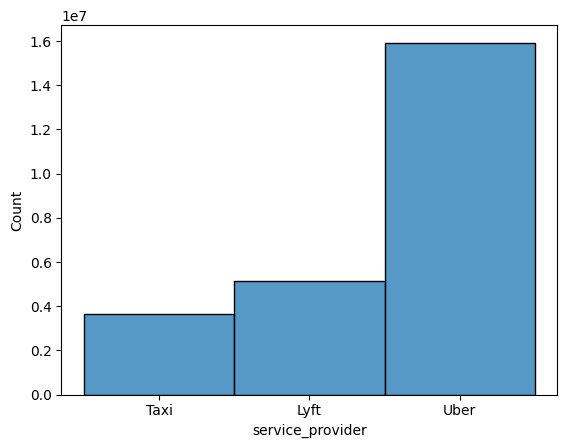

In [42]:
sns.histplot(x=trips_df['service_provider'])

<Axes: xlabel='transit_timestamp', ylabel='Count'>

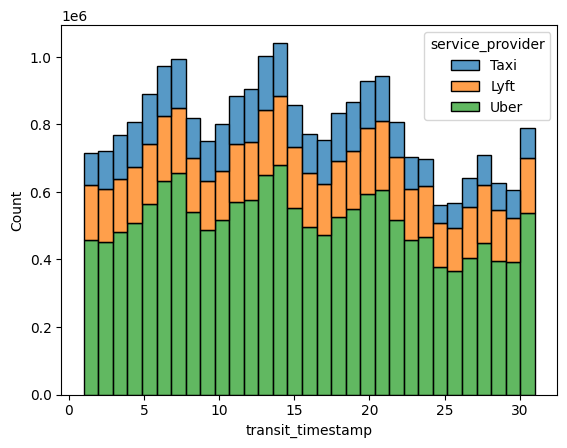

In [43]:
sns.histplot(data=trips_df, x=trips_df['transit_timestamp'].dt.day, bins=31, hue='service_provider', multiple='stack')

Text(0, 0.5, 'Demand')

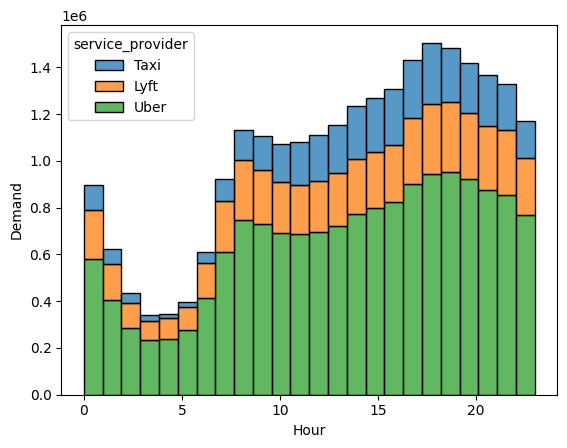

In [44]:
sns.histplot(data=trips_df, x=trips_df['transit_timestamp'].dt.hour, bins=24, hue='service_provider', multiple='stack')

plt.xlabel('Hour')
plt.ylabel('Demand')

<Axes: xlabel='Borough', ylabel='Count'>

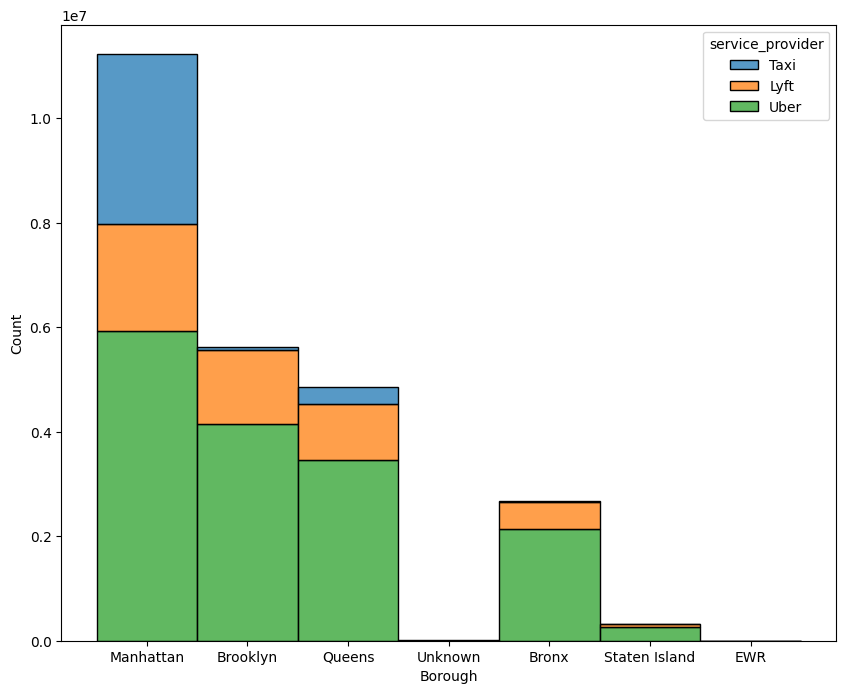

In [53]:
plt.figure(figsize=(10,8))
sns.histplot(data=trips_df, x='Borough', hue='service_provider', bins=200, multiple='stack')

## Buses & Subways

<Axes: xlabel='bus_route', ylabel='number_of_rides'>

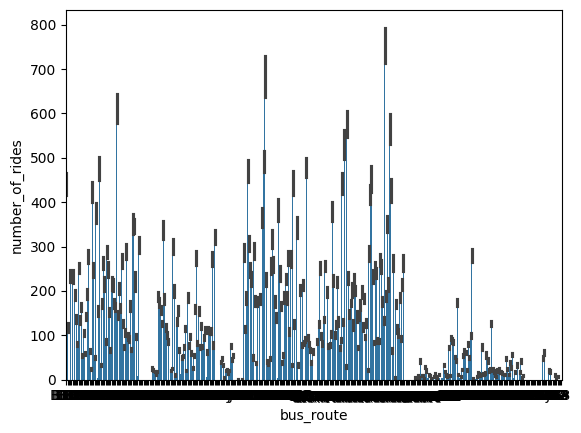

In [58]:
sns.barplot(data=bus_ridership_df, x='bus_route',y='number_of_rides')

# Creating Demand DataFrame

In [45]:
demand_trips_df = trips_df.copy()

#demand_trips_df['date'] = demand_trips_df['transit_timestamp'].dt.date
#demand_trips_df['hour'] = demand_trips_df['transit_timestamp'].dt.hour

#demand_trips_df.drop(columns='transit_timestamp',inplace=True)

#Aggregating data and calculating number of rides
demand_trips_df = demand_trips_df.groupby(['transit_timestamp','service_provider','LocationID','waiting_time']).size().reset_index(name='demand')

In [46]:
demand_trips_df.sample(10)

,transit_timestamp,service_provider,LocationID,waiting_time,demand
12563278,2024-12-15 17:44:30,Taxi,114,0.0,1
1783514,2024-12-03 14:31:37,Uber,138,6.0,1
14300189,2024-12-17 23:31:21,Uber,129,3.0,1
7053601,2024-12-09 15:53:26,Taxi,234,0.0,2
5976739,2024-12-08 04:27:10,Taxi,90,0.0,1
2880870,2024-12-04 21:33:11,Lyft,132,2.0,1
11324600,2024-12-14 12:43:40,Uber,127,6.0,1
8369324,2024-12-11 09:33:10,Uber,163,3.0,1
9882161,2024-12-12 23:00:51,Taxi,161,0.0,2
11078111,2024-12-14 04:19:34,Lyft,148,10.0,1


## Exploring Demand DF

Text(0, 0.5, 'Demand')

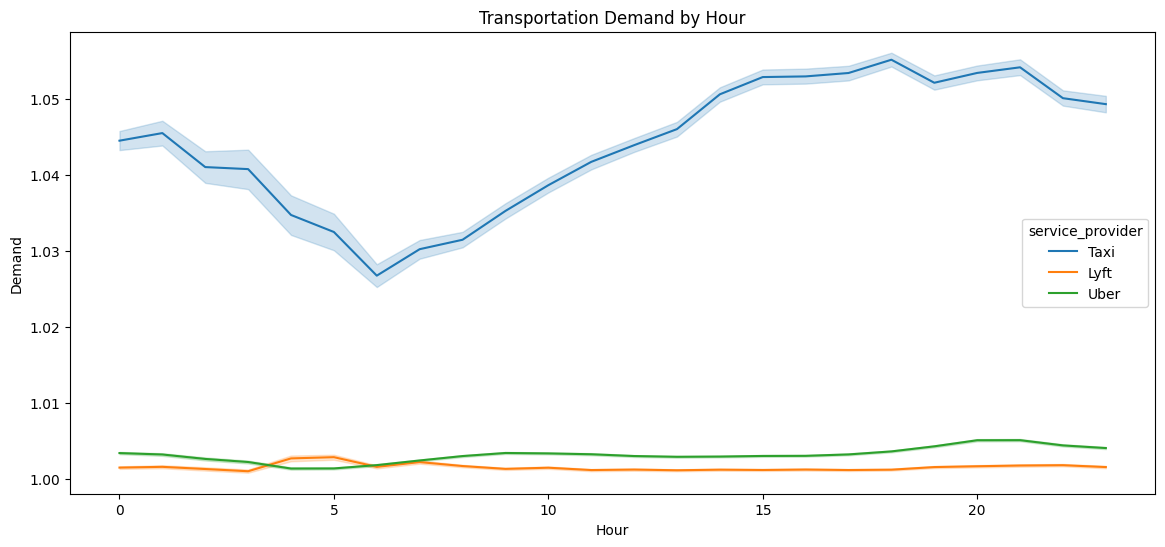

In [52]:
plt.figure(figsize=(14,6))
sns.lineplot(data=demand_trips_df,x=demand_trips_df['transit_timestamp'].dt.hour,y='demand',hue='service_provider')

plt.title("Transportation Demand by Hour")
plt.xlabel("Hour")
plt.ylabel("Demand")

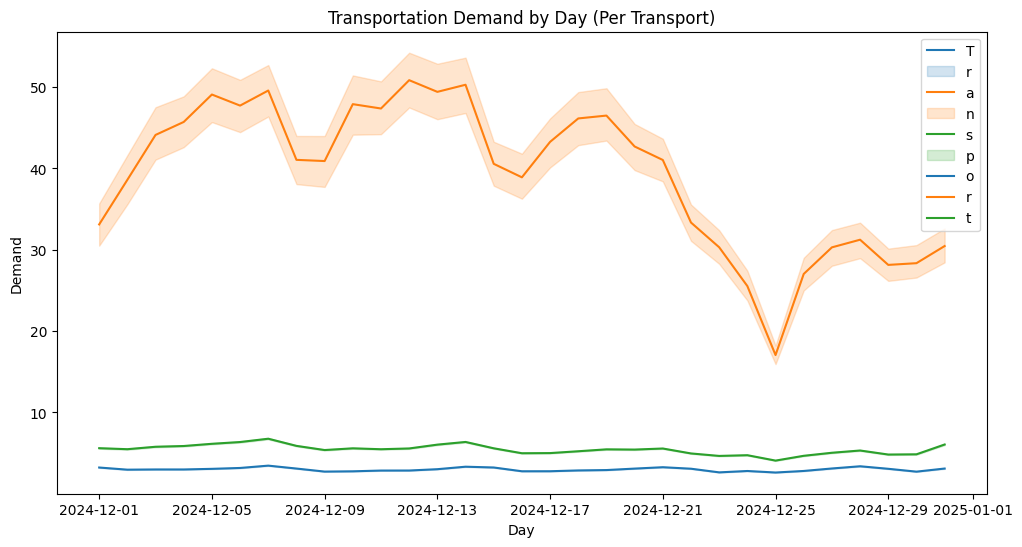

In [153]:
plt.figure(figsize=(12,6))
sns.lineplot(data=demand_trips_df,x='date',y='demand',hue='service_provider')

plt.title("Transportation Demand by Day (Per Transport)")
plt.xlabel("Day")
plt.ylabel("Demand")

#### Check Memory Usage

In [67]:
import sys

for var_name in dir():
    try:
        var_obj = globals()[var_name]
        if isinstance(var_obj, pd.DataFrame):
            mem = var_obj.memory_usage(deep=True).sum() / (1024 ** 3)  # GB
            if mem > 1:
                print(f"{var_name}: {mem:.2f} GB")
    except:
        pass  # skip anything that throws errors


demand_df: 2.09 GB
demand_trips_df: 1.77 GB
fhv_trip_df: 1.67 GB
trips_df: 6.57 GB


# Adding Events Feature

In [163]:
demand_trips_df = demand_trips_df.merge(taxi_zone_df, on='LocationID',how='left')

demand_trips_df.head(10)

,transit_timestamp,service_provider,LocationID,waiting_time,demand,Borough,Zone,service_zone
0,2024-12-01,Lyft,236,-56.0,1,Manhattan,Upper East Side North,Yellow Zone
1,2024-12-01,Taxi,144,0.0,1,Manhattan,Little Italy/NoLiTa,Yellow Zone
2,2024-12-01,Uber,7,-56.0,1,Queens,Astoria,Boro Zone
3,2024-12-01,Uber,36,-58.0,1,Brooklyn,Bushwick North,Boro Zone
4,2024-12-01,Uber,37,-56.0,1,Brooklyn,Bushwick South,Boro Zone
5,2024-12-01,Uber,37,-54.0,1,Brooklyn,Bushwick South,Boro Zone
6,2024-12-01,Uber,48,-57.0,1,Manhattan,Clinton East,Yellow Zone
7,2024-12-01,Uber,48,-54.0,1,Manhattan,Clinton East,Yellow Zone
8,2024-12-01,Uber,56,-54.0,1,Queens,Corona,Boro Zone
9,2024-12-01,Uber,71,-57.0,1,Brooklyn,East Flatbush/Farragut,Boro Zone


In [158]:
# Function to apply row by row
def get_event_count(row):
    matches = event_counts_by_borough_df[
        (event_counts_by_borough_df['event_borough'] == row['Borough']) &
        (event_counts_by_borough_df['start_date'] <= row['date']) &
        (event_counts_by_borough_df['end_date'] >= row['date']) &
        (event_counts_by_borough_df['start_hour'] <= row['hour']) &
        (event_counts_by_borough_df['end_hour'] >= row['hour'])
    ]
    return matches['number_of_events'].sum()  # or .max() if you prefer

# Apply function
demand_trips_df['number_of_events'] = demand_trips_df.apply(get_event_count, axis=1)


KeyboardInterrupt: 

In [ ]:
demand_trips_df.sample(10)